In [1]:

import cellular_automata as ca
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
def simulate_tumor_growth(time_delay, generations, rows, cols, phi, rho, k1, k2, k3, k4, cancer_init_positions, origin):
    history = {}
    M = ca.initialize_grid(rows, cols, cancer_init_positions)
    M_cluster = []

    for g in range(generations):
        M = ca.simulate_tumor_growth_one_step(M, g, time_delay, history, phi, rho, k1, k2, k3, k4, origin, rows, cols)

        M_cluster.append(M)

    return history, M_cluster

In [3]:
GENERATIONS = 500
ROWS = COLS = 101
ORIGIN = (COLS // 2, ROWS // 2)
PHI = 1000
CANCER_INIT_POSITIONS = [(ORIGIN[0], ORIGIN[1]), (ORIGIN[0] + 1, ORIGIN[1]), 
                         (ORIGIN[0] - 1, ORIGIN[1]), (ORIGIN[0], ORIGIN[1] - 1), 
                         (ORIGIN[0], ORIGIN[1] + 1)]
K2, K3, K4 = 0.2, 0.4, 0.4
RHO = 3.85

TIME_DELAY = 50
NO_TIME_DELAY = 0

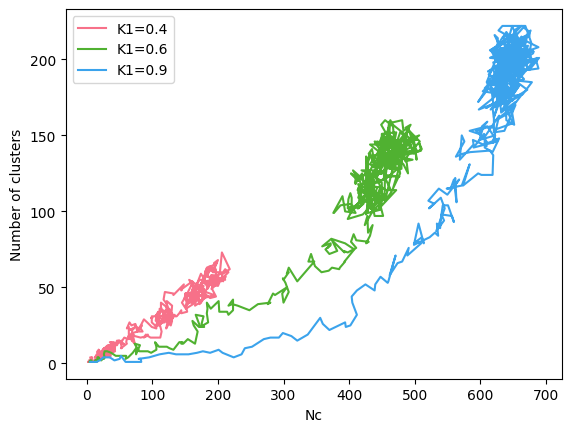

In [23]:
#No time delay


K1_histories = []
clusters = []

K1_values = [0.4, 0.6, 0.9]

for K1 in K1_values:
    history, Ms = simulate_tumor_growth(NO_TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    K1_histories.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS,COLS) for M in Ms]
    clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in K1_histories]

K1  = [i for i in K1_values]
palette = sns.color_palette('husl', len(K1))

for i,(history, cluster) in enumerate(zip(Nc_histories,clusters)):
    plt.plot(history,cluster, color=palette[i], label=f'K1={K1_values[i]}')
    plt.legend()
    plt.xlabel('Nc')
    plt.ylabel('Number of clusters')


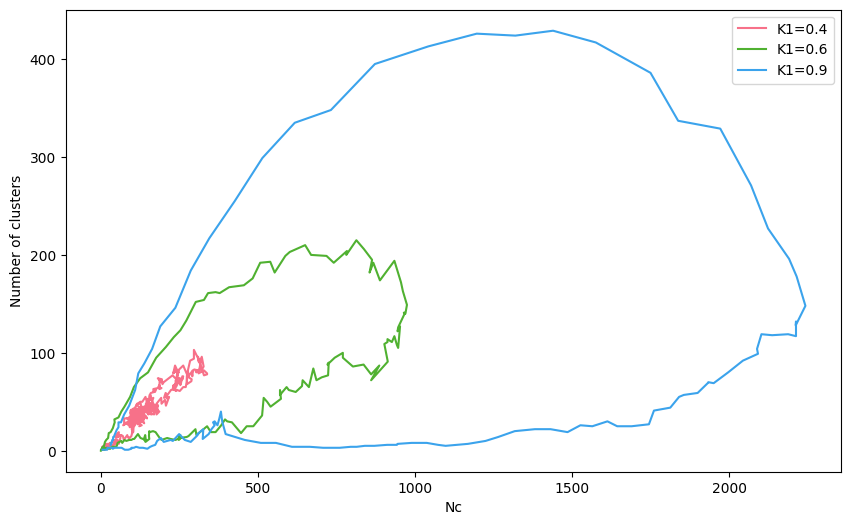

In [22]:
# One Time delay

TIME_DELAY = 50
K1_histories_delay = []
clusters_delay = []
K1_values = [0.4, 0.6, 0.9]

for K1 in K1_values:
    history, Ms = simulate_tumor_growth(TIME_DELAY, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
    K1_histories_delay.append(history)
    
    indiv_clusters = [ca.find_clusters(M, ROWS, COLS) for M in Ms]
    clusters_delay.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

Nc_histories_delay = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in K1_histories_delay]

plt.figure(figsize=(10, 6)) 
palette = sns.color_palette('husl', len(K1_values))

for i, (history, cluster) in enumerate(zip(Nc_histories_delay, clusters_delay)):
    plt.plot(history, cluster, color=palette[i], label=f'K1={K1_values[i]}')

plt.legend()
plt.xlabel('Nc')
plt.ylabel('Number of clusters')
plt.show()


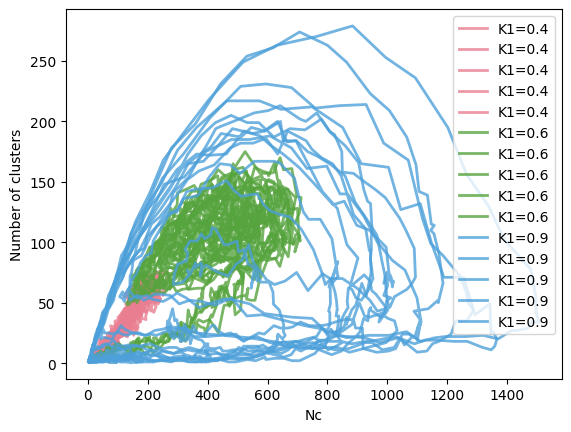

In [21]:
# Different time delays


K1_values = [0.4, 0.6, 0.9]
tau_values = range(25, 30)

# Create a color palette for different K1 values
k1_palette = sns.color_palette("husl", len(K1_values))

K1_histories_delay = []
clusters_delay = []

for i, K1 in enumerate(K1_values):
    k1_tau_histories = []
    k1_clusters = []

    # Create a color palette for different tau values within each K1
    tau_palette = sns.color_palette("Reds", len(tau_values))

    for j, tau in enumerate(tau_values):
        history, Ms = simulate_tumor_growth(tau, GENERATIONS, ROWS, COLS, PHI, RHO, K1, K2, K3, K4, CANCER_INIT_POSITIONS, ORIGIN)
        k1_tau_histories.append(history)

        indiv_clusters = [ca.find_clusters(M, ROWS, COLS) for M in Ms]
        k1_clusters.append([len(indiv_clusters[i]) for i in range(GENERATIONS)])

    Nc_histories = [[history[g]['Nc'] for g in range(GENERATIONS)] for history in k1_tau_histories]

    # Plotting
    for k, (history, cluster) in enumerate(zip(Nc_histories, k1_clusters)):
        plt.plot(history, cluster, color=sns.desaturate(k1_palette[i], j / len(tau_values)), lw=2, alpha=0.8, label=f'K1={K1_values[i]}')
        plt.xlabel('Nc')
        plt.ylabel('Number of clusters')
plt.legend()
plt.show()

